Import of libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,save_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [3]:
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random

In [4]:
import dask.bag as db
from dask.diagnostics import ProgressBar
from PIL import Image

In [5]:
from keras import regularizers
import pickle
import joblib
import uvicorn
from zipfile import ZipFile

Getting the working directory

In [6]:
os.getcwd()

'C:\\Users\\devel\\OneDrive\\Documents\\Notes\\SEM-2\\AI-and-ML-Lab-2404\\Project'

In [7]:
image_dir='C:\\Users\\devel\\OneDrive\\Documents\\Notes\\SEM-2\\AI-and-ML-Lab-2404\\Project\\Images-Set\\Gesture Image Data'

Getting the images from the folders

In [8]:
img_dir_names=os.listdir(image_dir)

In [9]:
print(img_dir_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_']


In [10]:
no_of_dir=list(range(len(img_dir_names)))

In [11]:
print(no_of_dir)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


Mapping of directories  and converting to dictionaries using zip function

In [12]:
direct_map=dict(zip(img_dir_names,no_of_dir)) 

In [13]:
print(direct_map)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, '_': 36}


Reverse map for model validation

In [14]:
rev_map=dict(zip(no_of_dir,img_dir_names)) 

In [15]:
print(rev_map)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: '_'}


In [16]:
A_img_path='C:\\Users\\devel\\OneDrive\\Documents\\Notes\\SEM-2\\AI-and-ML-Lab-2404\\Project\\Images-Set\\Gesture Image Data\\A\\18.jpg'

Reading image using cv2

In [17]:
sample_image=cv2.imread(A_img_path)

In [18]:
print(sample_image.shape)

(50, 50, 3)


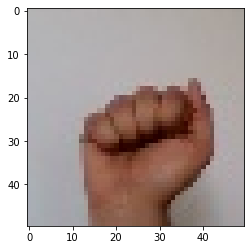

In [19]:
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))

Storing the images and directory images in variables

In [63]:
img_data=[]

In [64]:
img_name=[]

In [65]:
count=0

In [66]:
for dataname in tqdm(os.listdir(image_dir)):
    img_path=os.path.join(image_dir,dataname)
    for myimage in os.listdir(img_path):
        img=cv2.imread(os.path.join(img_path,myimage),cv2.IMREAD_GRAYSCALE)
        #img_1 = np.array(img) / 255
        image = cv2.resize(img,(224,224))
        img_ex = np.expand_dims(image, axis = 0)
        #imgs = image/255.0
        img_data+=[img_ex]
        img_name+=[count]
        
    count=count+1

100%|██████████| 37/37 [04:37<00:00,  7.50s/it]


In [67]:
type(img_data)

list

In [68]:
#img_name
unique_name = list(set(img_name))
print(unique_name)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [69]:
imdata=np.array(img_data)

In [70]:
imname=np.array(img_name)

In [71]:
my_labels=to_categorical(imname)

In [72]:
y=my_labels

In [73]:
X=imdata

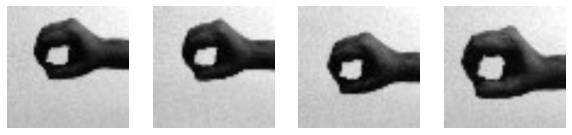

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [75]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [76]:
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (1, 224, 224)
Shape of an image in X_test:  (1, 224, 224)


In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44400, 1, 224, 224)
(11100, 1, 224, 224)
(44400, 37)
(11100, 37)


In [78]:
from keras.applications import vgg16

In [79]:
img_rows, img_cols = 224, 224 

In [80]:
vgg = vgg16.VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols,3))


In [81]:
# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default

In [82]:
for layer in vgg.layers:
    layer.trainable = False

In [83]:
# Let's print our layers 
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [84]:
def lw(bottom_model, num_classes):#creates the top or head of the model that will be placed ontop of the bottom layers
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [85]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model

In [86]:
num_classes = 37

In [87]:
FC_Head = lw(vgg, num_classes)

In [88]:
model = Model(inputs = vgg.input, outputs = FC_Head)

In [89]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [90]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [91]:
#X_train = tf.convert_to_tensor(X_train)
#y_train = tf.convert_to_tensor(y_train)

In [92]:
history = model.fit(X_train,y_train,
                    epochs=5, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\devel\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\devel\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\devel\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\devel\anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\devel\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\devel\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 1, 224, 224)
